In [1]:
%reload_ext autoreload
%autoreload 2

import sys

import numpy as np

sys.path.append("..")
from dm21cm.dm_params import DMParams

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file("../matplotlibrc")

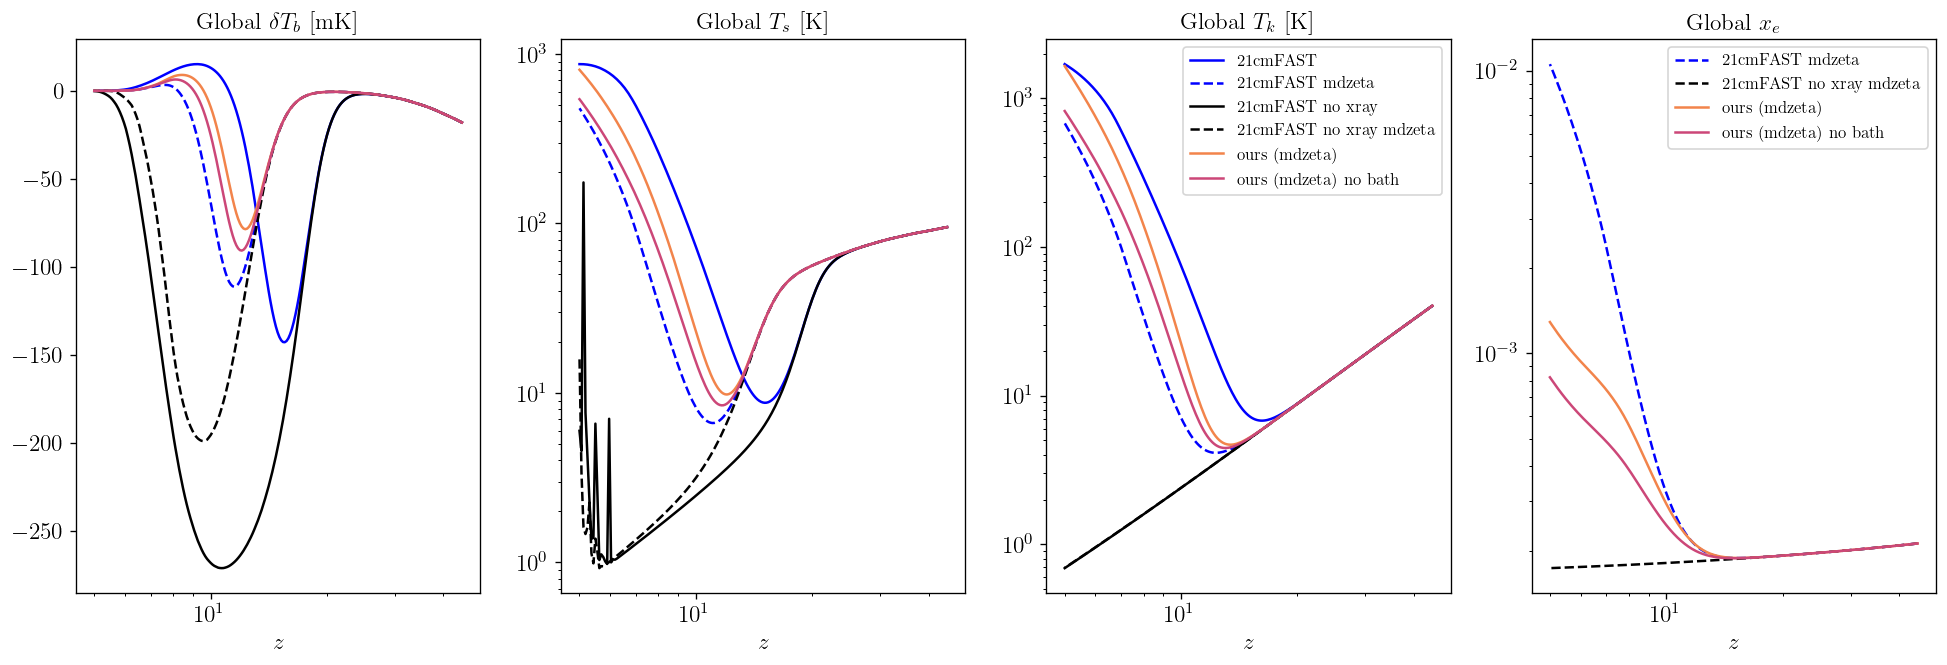

In [13]:
plot_options = {
    'base' : dict(color='b', ls='-'),
    'base_mdz' : dict(color='b', ls='--'),
    'noxray' : dict(color='k', ls='-'),
    'noxray_mdz' : dict(color='k', ls='--'),
    'ours' : dict(color=cms['plasma'](0.7)),
    'ours_nobath_m1' : dict(color=cms['plasma'](0.5)),
}
labels = {
    'T_b' : {
    },
    'T_s' : {
    },
    'T_k' : {
        'base' : '21cmFAST',
        'base_mdz' : '21cmFAST mdzeta',
        'noxray' : '21cmFAST no xray',
        'noxray_mdz' : '21cmFAST no xray mdzeta',
        'ours' : 'ours (mdzeta)',
        'ours_nobath_m1' : 'ours (mdzeta) no bath',
    },
}

fig, axs = plt.subplots(1, 4, figsize=(20, 6))

for name in plot_options.keys():
    
    records = np.load(f'../data/run_info/xc_{name}_records.npy', allow_pickle=True).item()
    
    axs[0].plot(records['z'], records['T_b'], label=(labels['T_b'][name] if name in labels['T_b'].keys() else None), **plot_options[name])
    axs[1].plot(records['z'], records['T_s'], label=(labels['T_s'][name] if name in labels['T_s'].keys() else None), **plot_options[name])
    axs[2].plot(records['z'], records['T_k'], label=(labels['T_k'][name] if name in labels['T_k'].keys() else None), **plot_options[name])
    if name not in ['noxray', 'base']:
        axs[3].plot(records['z'], records['x_e'], label=(labels['T_k'][name] if name in labels['T_k'].keys() else None), **plot_options[name])

axs[0].set(title=r'Global $\delta T_b$ [mK]', xlabel=r'$z$')
axs[1].set(title=r'Global $T_s$ [K]', xlabel=r'$z$')
axs[2].set(title=r'Global $T_k$ [K]', xlabel=r'$z$')
axs[3].set(title=r'Global $x_e$', xlabel=r'$z$')

axs[0].set(xscale='log')
axs[1].set(xscale='log', yscale='log')
axs[2].set(xscale='log', yscale='log')
axs[3].set(xscale='log', yscale='log')

axs[2].legend(fontsize=10)
axs[3].legend(fontsize=10)
#fig.savefig('../outputs/plots/global_evolution.pdf')